## Importing libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

['.git', '.ipynb_checkpoints', 'Heart Disease Prediction.ipynb', 'heart.csv']


## Import dataset 

In [35]:
ds = pd.read_csv("heart.csv")

## Verifying data set as 'dataframe' object in pandas

In [36]:
type(ds)

pandas.core.frame.DataFrame

# dataset shape

In [37]:
ds.shape

(303, 14)

## print some column

In [38]:
ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Description of Dataset

In [39]:
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## 'target' variable Analysing

In [41]:
ds["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [42]:
ds["target"].unique()

array([1, 0], dtype=int64)

## check correlation between columns

In [43]:
print(ds.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Data Exploration

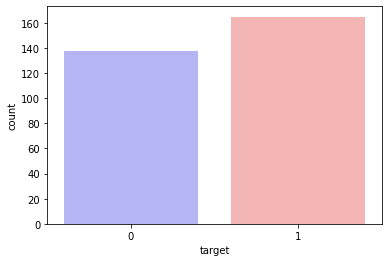

In [44]:
sns.countplot(x="target", data=ds, palette="bwr")
plt.show()

In [45]:
coutNoHProblem = len(ds[ds.target == 0])
coutHaveHProblem = len(ds[ds.target == 1])
print("Patients Haven't Heart problem: {:.2f}%".format((coutNoHProblem / (len(ds.target))*100)))
print("Patients Have Heart problem: {:.2f}%".format((coutHaveHProblem / (len(ds.target))*100)))

Patients Haven't Heart problem: 45.54%
Patients Have Heart problem: 54.46%


C:\Users\Acs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


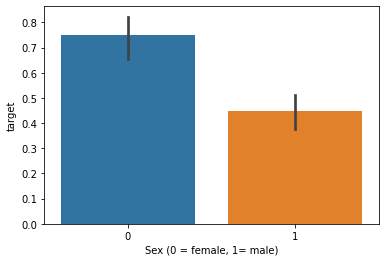

In [46]:
x = ds["sex"]
y = ds["target"]

sns.barplot(x,y)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [47]:
## females can have heart attak than males

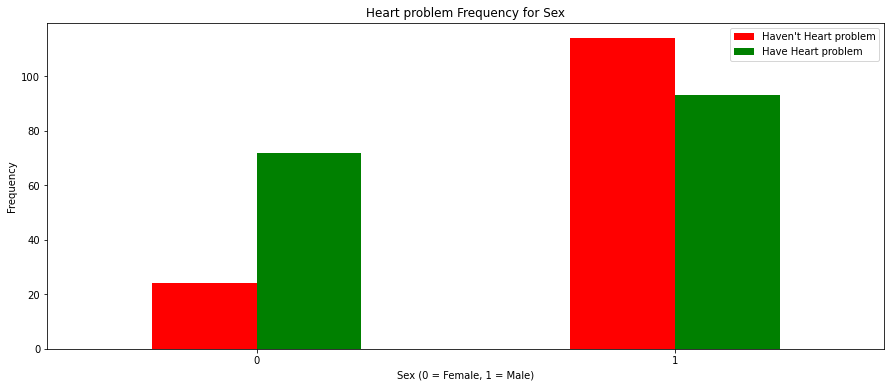

In [48]:
pd.crosstab(ds.sex,ds.target).plot(kind="bar",figsize=(15,6),color=['red','green' ])
plt.title('Heart problem Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Heart problem", "Have Heart problem"])
plt.ylabel('Frequency')
plt.show()

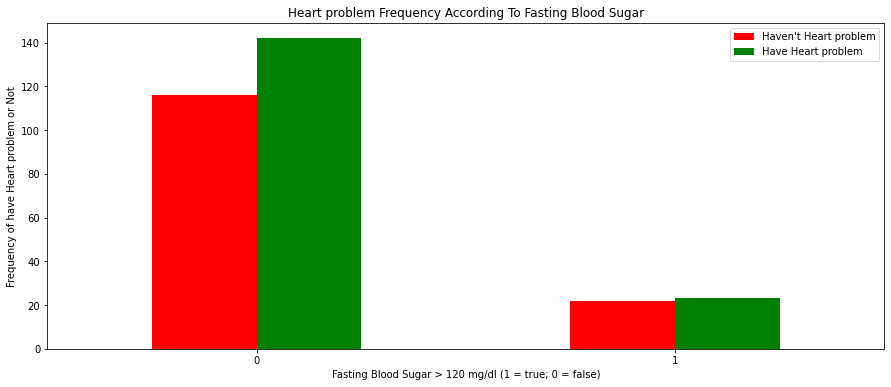

In [49]:
pd.crosstab(ds.fbs,ds.target).plot(kind="bar",figsize=(15,6),color=['red','green' ])
plt.title('Heart problem Frequency According To Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Heart problem", "Have Heart problem"])
plt.ylabel('Frequency of have Heart problem or Not')
plt.show()

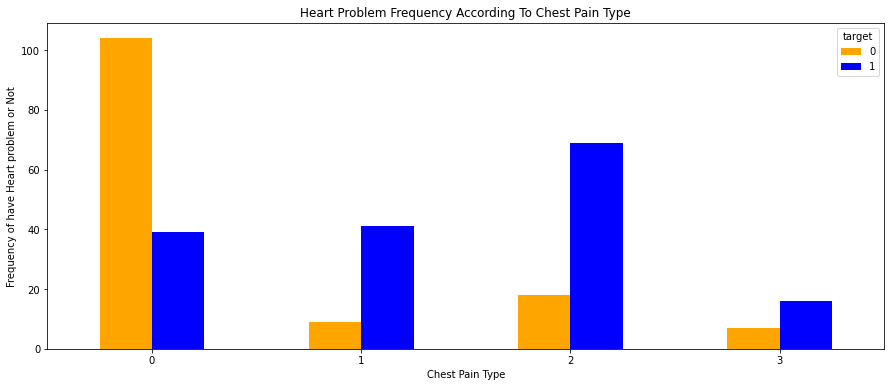

In [50]:
pd.crosstab(ds.cp,ds.target).plot(kind="bar",figsize=(15,6),color=['orange','blue' ])
plt.title('Heart Problem Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of have Heart problem or Not')
plt.show()

## Split data set for training and testing

In [51]:
from sklearn.model_selection import train_test_split

predict = ds.drop("target",axis=1)
target = ds["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predict,target,test_size=0.20,random_state=0)

In [52]:
X_train.shape

(242, 13)

In [53]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [54]:
Y_train.shape

(242,)

In [55]:
Y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

## Model Fitting - IT19016894 

In [56]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg = LogisticRegression(max_iter=1000)

LogReg.fit(X_train,Y_train)

predict_LogReg = LogReg.predict(X_test)

In [58]:
predict_LogReg.shape

(61,)

In [59]:
LogRegScore = round(accuracy_score(predict_LogReg,Y_test)*100,2)

print("Accuracy achieved with Logistic Regression : "+str(LogRegScore)+" %")

Accuracy achieved with Logistic Regression : 85.25 %


### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

MaxAccuracy = 0

for i in range(350):
    RForest = RandomForestClassifier(random_state=i)
    RForest.fit(X_train,Y_train)
    PredRForest = RForest.predict(X_test)
    curAccuracy = round(accuracy_score(PredRForest,Y_test)*100,2)
    if(curAccuracy>MaxAccuracy):
        MaxAccuracy = curAccuracy
        best_RS = i
        
print("Max Accuracy: "+str(MaxAccuracy)+" %")
print("Best Random State For Max Accuracy: "+str(best_RS))

RForest = RandomForestClassifier(random_state=best_RS)
RForest.fit(X_train,Y_train)
PredRForest = RForest.predict(X_test)

Max Accuracy: 90.16 %
Best Random State For Max Accuracy: 323


In [61]:
PredRForest.shape

(61,)

In [62]:
RandForestScore = round(accuracy_score(PredRForest,Y_test)*100,2)

print("Accuracy achieved with Random Forest: "+str(RandForestScore)+" %")

Accuracy achieved with Random Forest: 90.16 %


## Model Training - IT19158396

### K-Nearest Neighbors

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=7)
knnClassifier.fit(X_train,Y_train)
Y_predict_knnClassifier=knnClassifier.predict(X_test)

In [65]:
Y_predict_knnClassifier.shape

(61,)

In [66]:
score_knn = round(accuracy_score(Y_predict_knnClassifier,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,Y_train)
Y_predict_knnClassifier=knnClassifier.predict(X_test)

In [68]:
Y_predict_knnClassifier.shape

(61,)

In [69]:
score_knn = round(accuracy_score(Y_predict_knnClassifier,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 63.93 %


## Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

maximum_accuracy = 0


for value in range(200):
    decisionTree = DecisionTreeClassifier(random_state=value)
    decisionTree.fit(X_train,Y_train)
    Y_prediction_decisionTree = decisionTree.predict(X_test)
    current_accuracy = round(accuracy_score(Y_prediction_decisionTree,Y_test)*100,2)
    if(current_accuracy>maximum_accuracy):
        maximum_accuracy = current_accuracy
        best_x = value
        
#print(max_accuracy)
#print(best_x)


decisionTree = DecisionTreeClassifier(random_state=best_x)
decisionTree.fit(X_train,Y_train)
Y_prediction_decisionTree = decisionTree.predict(X_test)

In [71]:
print(Y_prediction_decisionTree.shape)

(61,)


In [72]:
score_dt = round(accuracy_score(Y_prediction_decisionTree,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


# Model Training - IT19085968

# Naive Bayes

from sklearn.naive_bayes import GaussianNB

naiveBayesM = GaussianNB()

naiveBayesM.fit(X_train,Y_train)

Y_predict_naiveBayesM = naiveBayesM.predict(X_test)

In [74]:
Y_predict_naiveBayesM.shape

(61,)

In [75]:
naiveBayesM_Score = round(accuracy_score(Y_predict_naiveBayesM,Y_test)*100,2)

print("The Accuracy Score achieved by using Naive Bayes algorithm is: "+str(naiveBayesM_Score)+" %")

The Accuracy Score achieved by using Naive Bayes algorithm is: 85.25 %


# Support Vector Machine

In [78]:
from sklearn import svm

supportVectorMachineM = svm.SVC(kernel='linear')

supportVectorMachineM.fit(X_train, Y_train)

Y_predict_supportVectorMachineM = supportVectorMachineM.predict(X_test)

In [79]:
Y_predict_supportVectorMachineM.shape

(61,)

In [80]:
supportVectorMachineM_Score = round(accuracy_score(Y_predict_supportVectorMachineM,Y_test)*100,2)


print("The Accuracy Score achieved by using Support Vector Machine algorithm is: "+str(supportVectorMachineM_Score)+" %")

The Accuracy Score achieved by using Support Vector Machine algorithm is: 81.97 %


# Final score comparison

In [82]:
totalScores = [LogRegScore,RandForestScore,score_knn,score_dt,naiveBayesM_Score,supportVectorMachineM_Score]
mlAlgorithms = ["Logistic Regression algorithm","Random Forest algorithm","K-Nearest Neighbors algorithm","Decision Tree algorithm","Naive Bayes algorithm","Support Vector Machine algorithm"]    

for i in range(len(mlAlgorithms)):
    print("The Accuracy Score achieved by using "+mlAlgorithms[i]+" is: "+str(totalScores[i])+" %")

The Accuracy Score achieved by using Logistic Regression algorithm is: 85.25 %
The Accuracy Score achieved by using Random Forest algorithm is: 90.16 %
The Accuracy Score achieved by using K-Nearest Neighbors algorithm is: 63.93 %
The Accuracy Score achieved by using Decision Tree algorithm is: 81.97 %
The Accuracy Score achieved by using Naive Bayes algorithm is: 85.25 %
The Accuracy Score achieved by using Support Vector Machine algorithm is: 81.97 %


C:\Users\Acs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ML algorithms', ylabel='Accuracy Score'>

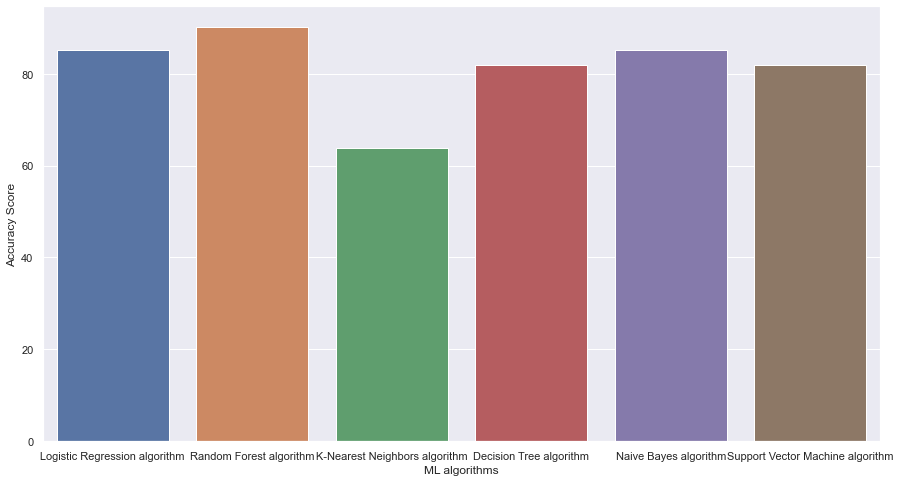

In [83]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(mlAlgorithms,totalScores)